In [29]:
# import the libraries

import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import fix_yahoo_finance as yf

In [30]:
# predefined functions in this cell ,  no need to chagne them

def downloadStockData(tickers,start,end):
    """
        This function downloads the Close price of the stock and creates a dataframe from it
        Params:
            tickers : a list of ticker of various stocks
            start   : it is the start date of the data to be downloaded. It is a datetime in datetime format.
            end     : it is the end date of the data to be downloaded. It is a datetime in datetime format.

        Return:
            A dataframe with all the close for of each stock on each open market day
    """
    ticker_data = pdr.get_data_yahoo(tickers, start, end)['Close']
    return ticker_data

def zscore(series):
    return (series - series.mean()) / np.std(series)

def plot_ratios(ratio):
    """
        This function just plots the ratios plot 
        Params:
            ratio : a list of the the ration of two stock price 
    """
    ratios.plot()
    plt.axhline(ratios.mean(),color="yellow")
    plt.show()


In [31]:
def findCointegrationValue(data,p_value_threshold=0.05):
    """
        This function find out the pairs of stock with p value less than a constant
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            p values of all the pairs , the list of all the pairs with p value less than the threshold 
    """
    n = data.shape[1]
    score_ = np.zeros((n, n))
    pvalue_ = np.zeros((n, n))
    keys = data.keys()
    pairs = []

    for i in range(n):
        for j in range(i+1, n):
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1, s2)
            score_[i, j] = result[0]
            pvalue_[i, j] = result[1]
            
            if result[1] < p_value_threshold:
                pairs.append((keys[i], keys[j], result[1]))
                
    
    return score_, pvalue_, pairs

In [32]:
def getBestKCointergratedStocks(data,k=10,p_value_threshold=0.05):
    """
        This functions find out the k pairs with the least p value and all of them should be less than the threshold  
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            k                  : the number of pairs to be found out
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            the p value for all the pairs of stocks , the list k pairs with the least p value and their p values . If k such pairs doesn't exists return how many of them occur 
    """
    df = pd.DataFrame(data, columns=['X', 'Y', 'pvalue'])
  
    return df.sort_values(by='pvalue').head(k)

In [33]:
def distanceBetweenStocks(data1,data2,window_size):
    """
        This function takes list of two stocks and find the distance between the stocks 
        Params:
            data1: list of stock price of stock1
            data2: list of stock price of stock2
            window_size : the window size
        Returns:
            the distance between the lists

        Note:
            In this function do try to normalise the stock price and try out some variations in it.
    """ 


In [34]:
def getBestKLessDistanceStocks(data,k=10):
    """
        This functions find out the k pairs with the least distance between them  
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            k                  : the number of pairs to be found out
            
        Returns:
            the distance between all the stock pairs, the list of k pairs with the least distance between them
    """


In [35]:
!pip install yfinance
import yfinance as yf
tickers = ['ADANIPORTS.NS',
 'TECHM.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'SUNPHARMA.NS',
 'INFY.NS',
 'HINDALCO.NS',
 'DRREDDY.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'CIPLA.NS',
 'ITC.NS',
 'BPCL.NS',
 'WIPRO.NS',
 'JSWSTEEL.NS',
 'GAIL.NS',
 'DIVISLAB.NS',
 'ULTRACEMCO.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'EICHERMOT.NS',
 'IOC.NS',
 'GRASIM.NS',
 'BAJAJ-AUTO.NS',
 'HDFC.NS',
 'M&M.NS',
 'UPL.NS',
 'SHREECEM.NS',
 'MARUTI.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'KOTAKBANK.NS',
 'COALINDIA.NS',
 'BHARTIARTL.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ONGC.NS',
 'SBIN.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'AXISBANK.NS',
 'HDFCBANK.NS',
 'TATAMOTORS.NS',
 'ICICIBANK.NS',
 'POWERGRID.NS',
 'INDUSINDBK.NS']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,1,1)
# data = downloadStockData(tickers,start,end)

yf.pdr_override()
data = pd.DataFrame()
for i in range(len(tickers)):
    try:
        o = pdr.get_data_yahoo(tickers[i],start, end)
        data[str(tickers[i])] = o["Close"]
    except:
        print('error')
        print(i)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***

In [36]:
data.dropna(inplace = True)
data

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,145.050003,177.912506,204.675003,579.025024,243.649994,432.293762,246.100006,1670.500000,113.537498,313.149994,...,215.466660,282.209991,522.843933,68.472191,273.529999,239.050003,258.912903,208.154541,73.725021,264.649994
2011-01-04,148.550003,186.149994,204.800003,572.375000,244.949997,435.181244,244.100006,1696.250000,115.287498,320.899994,...,214.508331,273.559998,533.493042,68.049553,269.589996,234.554993,256.924225,200.736359,73.800018,255.750000
2011-01-05,157.600006,182.137497,205.000000,579.474976,244.024994,432.450012,246.500000,1715.250000,118.087502,325.700012,...,211.024994,269.320007,532.849121,67.767792,262.179993,230.820007,253.837341,194.427277,73.575020,249.050003
2011-01-06,154.949997,182.462494,200.824997,585.849976,250.000000,434.768738,251.350006,1716.349976,119.425003,320.750000,...,204.550003,262.239990,537.703125,66.917656,261.170013,232.774994,249.523605,191.536362,74.250015,243.899994
2011-01-07,147.250000,176.925003,197.899994,571.325012,246.675003,421.343750,233.300003,1672.650024,116.312500,313.049988,...,200.975006,260.095001,527.697937,64.090355,256.130005,226.945007,235.513885,190.763641,73.387520,230.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,2402.250000,...,93.150002,266.850006,1994.150024,5184.899902,610.200012,1397.099976,175.949997,513.549988,142.500031,852.799988
2020-12-28,483.549988,947.099976,3603.550049,2929.399902,586.950012,1240.300049,239.899994,5201.799805,921.799988,2388.899902,...,93.800003,275.200012,2003.300049,5204.100098,617.650024,1412.849976,186.350006,520.099976,143.662537,866.950012
2020-12-29,483.399994,965.650024,3593.300049,2930.500000,590.599976,1250.300049,235.600006,5165.600098,935.900024,2384.300049,...,93.150002,277.899994,1990.050049,5200.500000,630.200012,1427.199951,183.449997,528.799988,142.275040,912.900024


In [37]:
scores_final, pvalues_final, pairs_final =  findCointegrationValue(data=data)

In [38]:
df = getBestKCointergratedStocks(pairs_final, p_value_threshold=0.05) 

In [39]:
df

,X,Y,pvalue
42,ULTRACEMCO.NS,BAJAJ-AUTO.NS,0.000005
54,HDFC.NS,BAJAJFINSV.NS,0.000146
50,BAJAJ-AUTO.NS,SHREECEM.NS,0.000456
45,NESTLEIND.NS,RELIANCE.NS,0.001394
63,COALINDIA.NS,RELIANCE.NS,0.003227
39,BPCL.NS,BAJAJ-AUTO.NS,0.003605
15,HINDUNILVR.NS,BAJFINANCE.NS,0.004294
60,TITAN.NS,BAJFINANCE.NS,0.004332
20,NTPC.NS,DIVISLAB.NS,0.004724
4,INFY.NS,DIVISLAB.NS,0.005005


In [40]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

X1 = data["ULTRACEMCO.NS"]
X2 = data["BAJAJ-AUTO.NS"]
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const            1009.097545
ULTRACEMCO.NS       0.464484
dtype: float64

0.8288190926889301

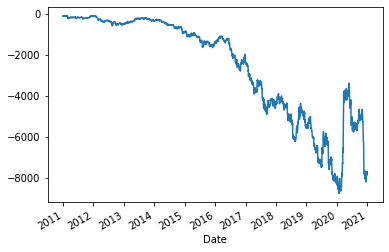

In [41]:
(0.464484*data["HDFC.NS"]-data["BAJAJFINSV.NS"]).plot()
adfuller(0.464484*data["HDFC.NS"]-data["BAJAJFINSV.NS"])[1]

In [42]:
tickers = ['ULTRACEMCO.NS','BAJAJ-AUTO.NS']
start = datetime.datetime(2020,4,20)
end = datetime.datetime(2021,11,30)

yf.pdr_override()
datanew = pd.DataFrame()
for i in range(len(tickers)):
    try:
        o = pdr.get_data_yahoo(tickers[i],start, end)
        datanew[str(tickers[i])] = o["Close"]
    except:
        print('error')
        print(i)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
datanew

,ULTRACEMCO.NS,BAJAJ-AUTO.NS
Date,,
2020-04-20,3516.550049,2378.300049
2020-04-21,3403.250000,2323.250000
2020-04-22,3441.149902,2379.699951
2020-04-23,3442.199951,2430.649902
2020-04-24,3307.949951,2445.350098
...,...,...
2021-11-23,7657.950195,3434.850098
2021-11-24,7577.299805,3407.100098
2021-11-25,7608.799805,3391.699951


                0  ULTRACEMCO.NS  BAJAJ-AUTO.NS    zscore
0    17677.644627    3834.250000    2796.100098  1.634599
1    17805.948806    3855.899902    2783.399902  1.640212
2    17494.434309    3803.899902    2817.250000  1.229252
3    17885.936347    3869.550049    2776.300049  1.499660
4    17373.404230    3778.199951    2801.050049  0.942958
..            ...            ...            ...       ...
369  37456.306560    7657.950195    3434.850098  0.297787
370  37053.407669    7577.299805    3407.100098  0.063774
371  37237.008366    7608.799805    3391.699951  0.126639
372  36151.146477    7394.750000    3334.600098 -0.475932
373  36152.838574    7388.250000    3298.199951 -0.496283

[374 rows x 4 columns]
0.00010909934655677386
Hedged profit 128.30417885742187
Hedged profit -311.51449765625
Hedged profit 391.5020383544922
Hedged profit -512.532116455078
Hedged profit -317.9546132324219
Hedged profit -379.361241455078
Hedged profit 209.99620854492187
Hedged profit -274.037743798828

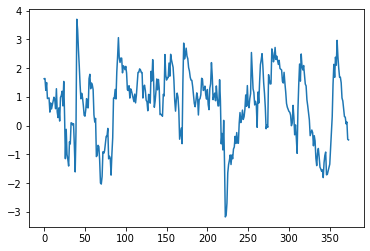

In [44]:
import numpy as np
import pandas as pd
import statsmodels
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime

def trade(S1, S2,window, MAX_SHORTING_AMOUNT, MAX_TRANSACTION_AT_A_TIME,error_bound1,error_bound2):
    
    spread = []
    beta = 5.3397
    spread.append(beta*S1 - S2)
    df = pd.DataFrame(spread)
    df = df.T  
    df["ULTRACEMCO.NS"] = datanew["ULTRACEMCO.NS"]  
    df["BAJAJ-AUTO.NS"] = datanew["BAJAJ-AUTO.NS"]
    df["Roll mean"] = df[0].rolling(window = 30).mean()
    df["Roll std"] = df[0].rolling(window = 30).std()
    df["zscore"] = (df[0]-df["Roll mean"])/df["Roll std"]
    df = df.drop(["Roll mean", "Roll std"], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop=True)
    print(df)
    df["zscore"].plot()
    print(adfuller(df["zscore"].dropna())[1]) 
    df["Buy"] = 0
    df["Sell"] = 0
    for i in range(len(df)) :
      if i==0 :
        df.loc[i,"Buy"] = 1 if df.loc[i,"zscore"]>1.5 and df.loc[i,"zscore"]<2 else 0
      else :
        if df.loc[i,"zscore"]>1.5 and df.loc[i,"zscore"]<2:
          df.loc[i,"Buy"] = 1
        if df.loc[i-1, "Buy"] == 1 and df.loc[i,"zscore"]>1 and df.loc[i,"zscore"]<2:
          df.loc[i,"Buy"] = 1  
    for i in range(len(df)) :
      if i==0 :
        df.loc[i,"Sell"] = 1 if df.loc[i,"zscore"]<-1.5 and df.loc[i,"zscore"]>-2 else 0
      else :
        if df.loc[i,"zscore"]<-1.5 and df.loc[i,"zscore"]>-2:
          df.loc[i,"Sell"] = 1
        if df.loc[i-1, "Sell"] == 1 and df.loc[i,"zscore"]<-1 and df.loc[i,"zscore"]>-2:
          df.loc[i,"Sell"] = 1 
    money = 0 
    for i in range(len(df)-1) :
      if df.loc[i,"Buy"] == 1 : 
        money += beta*(df.loc[i+1,"ULTRACEMCO.NS"]-df.loc[i,"ULTRACEMCO.NS"])
        money -= (df.loc[i+1,"BAJAJ-AUTO.NS"] - df.loc[i,"BAJAJ-AUTO.NS"])
        print("Hedged profit %s" %(df.loc[i,"BAJAJ-AUTO.NS"] - df.loc[i+1,"BAJAJ-AUTO.NS"] + beta*(df.loc[i+1,"ULTRACEMCO.NS"]-df.loc[i,"ULTRACEMCO.NS"])))

      elif df.loc[i,"Sell"] == 1:
        money += (df.loc[i+1,"BAJAJ-AUTO.NS"] - df.loc[i,"BAJAJ-AUTO.NS"])
        money -= beta*(df.loc[i+1,"ULTRACEMCO.NS"]-df.loc[i,"ULTRACEMCO.NS"])
        print("Hedged profit %s" %(beta*(df.loc[i,"ULTRACEMCO.NS"]-df.loc[i+1,"ULTRACEMCO.NS"]) + df.loc[i+1,"BAJAJ-AUTO.NS"] - df.loc[i,"BAJAJ-AUTO.NS"]))
     
    print(df)

##print(df.head(60))
    print(money)

trade( datanew['ULTRACEMCO.NS'],datanew['BAJAJ-AUTO.NS'], 60,10000,5,0.5,0.25)

# Reaons why those 2 stocks are similar. (Explain for any 2 stocks in this text cell)

We know that the **Pairs trading** strategies speculate on future convergence of spread between similar securities. Similarity concerns industry, sector, market capitalization, and other common exposures that might imply a comovement between stocks.

Take example of Toyota and Volkswagan, These companies share the same sector, i.e., **Automobile**, and even their Industry is same, i.e., Car Manufacturer. 

Hence it can be understood that companies sharing common industry and type of sector, are leveraged by the macroecomic factors like GDP growth, etc has a similar kind of effect on their trade. As we know pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement and both these stocks fulfill this in as a pair. So, that's why the particular stocks are similar.

This criteria is fulfilled by chossing 2 companies in sector of **Automobile and Infrastructure**.
